<a href="https://colab.research.google.com/github/ritwiks9635/Resume_Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IMPORT MODULE

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

load dataset

In [ ]:
data = pd.read_csv("/content/UpdatedResumeDataSet.csv", encoding= "utf-8")
data["clean_text"] = " "
data.head()

,Category,Resume,clean_text
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
print("Display the Categories")
print(data["Category"].unique())

Display the Categories
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print("Categories of resume and the number of records ::")
print(data["Category"].value_counts())

Categories of resume and the number of records ::
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


Plotting the data

<Axes: xlabel='count', ylabel='Category'>

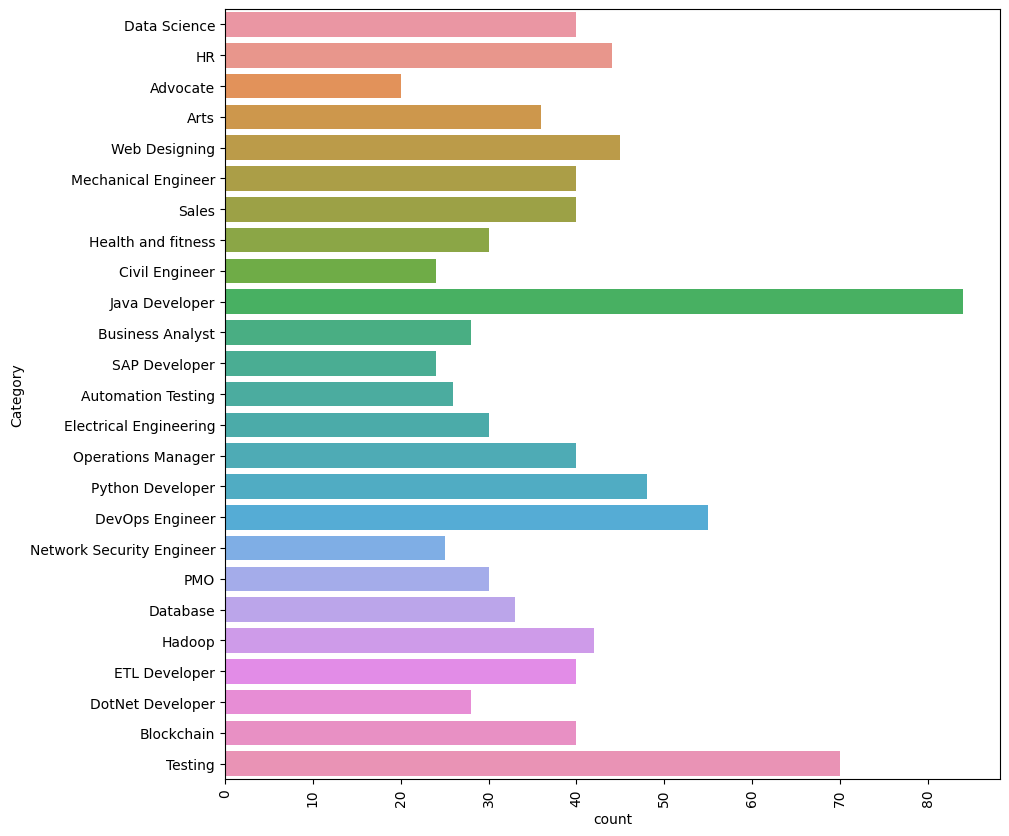

In [ ]:
import seaborn as sns 
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.countplot(y = "Category", data = data)

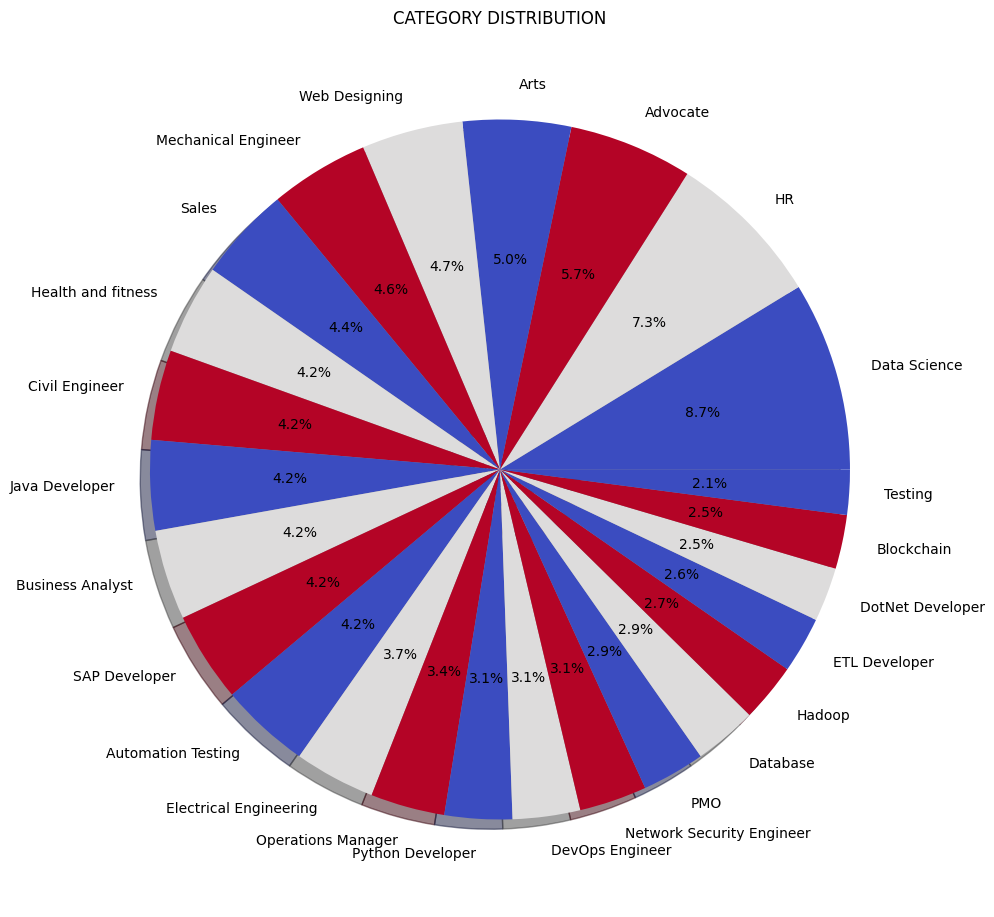

In [ ]:
from matplotlib.gridspec import GridSpec
target_counts = data["Category"].value_counts()
target_labels = data["Category"].unique()
plt.figure(1,figsize=(25,25))
gridspec = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(gridspec[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Clean dataset

In [ ]:
import re
def clean_data(text):
  resumeText = re.sub('http\S+\s*', ' ', text)  # remove URLs
  resumeText = re.sub('RT|cc', ' ', text)  # remove RT and cc
  resumeText = re.sub('#\S+', '', text)  # remove hashtags
  resumeText = re.sub('@\S+', '  ', text)  # remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]',r' ', text)
  resumeText = re.sub('\s+', ' ', text)  # remove extra whitespace
  return resumeText

In [ ]:
data["clean_text"] = data.Resume.apply(lambda x : clean_data(x))

Tokeniz the data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('â\x80¢', 542), ('Details', 484), ('Exprience', 446), ('months', 376), ('company', 326), ('description', 310), ('Ã±', 300), ('1', 286), ('year', 228), ('January', 216), ('Less', 204), ('Data', 196), ('data', 192), ('Maharashtra', 166), ('6', 160), ('Skill', 160), ('Science', 154), ('â\x97\x8f', 144), ('College', 140), ('I', 134), ('Education', 128), ('The', 126), ('project', 126), ('like', 126), ('Python', 124), ('Machine', 112), ('University', 112), ('â\x96ª', 108), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('Learning', 100), ('time', 92), ('Project', 92), ('India', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('SQL', 80), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('learning', 74), ('Engineering', 74), ('projects', 74), ('Technologies', 72), ('Used', 72)]


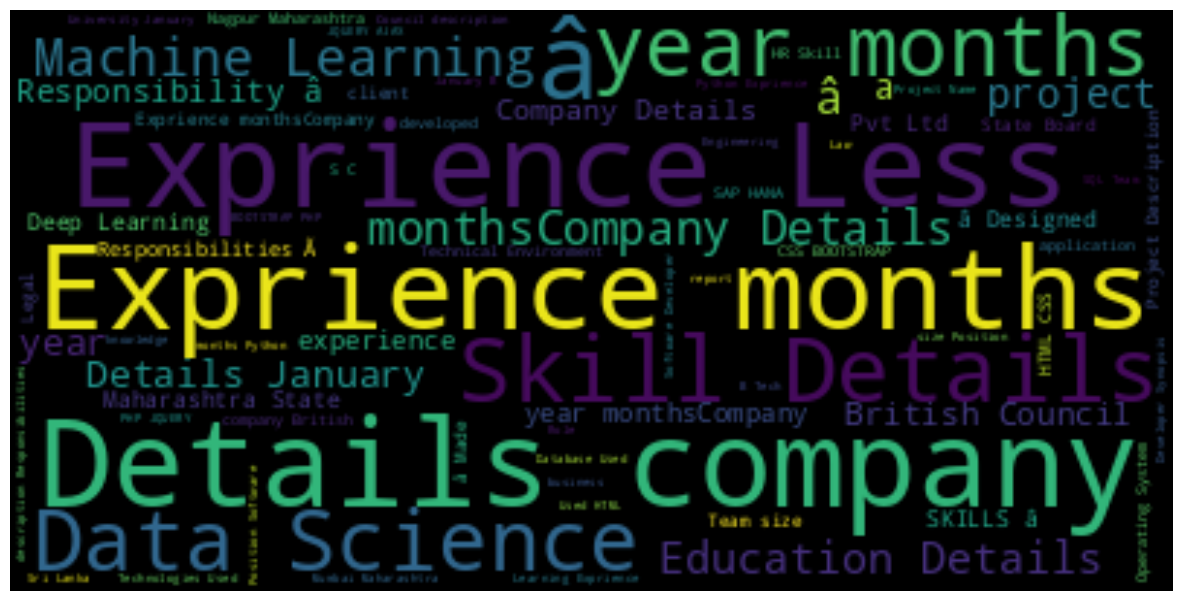

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
stopwords = set(stopwords.words('english')+['``',"''"])
total_words = []
sentence = data["Resume"].values
cleaned_sentence = ""
for i in range(0,160):
  cleanText = clean_data(sentence[i])
  cleaned_sentence += cleanText
  word_token = nltk.word_tokenize(cleanText)
  for word in word_token:
    if word not in stopwords and word not in string.punctuation:
      total_words.append(word)

word_freqdist = nltk.FreqDist(total_words)
most_common = word_freqdist.most_common(50)
print(most_common)

wc = WordCloud().generate(cleaned_sentence)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
  data[i] = le.fit_transform(data[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
requiredText = data['clean_text'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print ("Feature completed .....")
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.99


In [ ]:
print(prediction)
print()
print()
print(y_test)

[20 14  6 17 15 14 10 14 15 11  6 23  4 11 13  4 19  8  8  9 12 11 17 22
 19 16  5  8  3  5 20 18 22  7 23 23 22 18  7 20 10 20 14  8 15 15  8 11
  4 22  1 24 14 15 22 23  8 15  3 17 18  3  0 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  7 19  4 24 14  7  1 24 13 12 10  9  8 22  9 23 11  9 23
 11 15 23 13  4 17  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22  6 14  6
  0  4  5  7  9 13 23  6  9  9 21 11  5  3  9 24 19 13  8  3 13 13 11 20
 16 23 21 24  7 21 20 15 22 19 15 23  9 15 15  6  2 20  7 11 23 24  8  3
 20  2 10 22 15  2 11 23  1 23  6  3  3 24 24 12  5 23 18 22 20 20  3  6
 15]


[20 14  6 17 15 14 10 14 15  2  6 23  4 11 13  4 19  8  8  9 12 11 17 22
 19 16  5  8  3  8 20 18 22  7 23 23 22 18  7 20 10 20 14  8 15 15  8 11
  4 22  1 24 14 15 22 23  8 15  3 17 18  3  0 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  7 19  4 24 14  7  1 24 13 12 10  9  8 22  9 23 11  9 23
 11 15 23 13  4 17  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22  6 14  6
  0  4  5  7  9 13 23  6  9  9 21 11  5  3  